# 코로나19 동향 예측하기

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
PatientInfo = pd.read_csv('./COVIDdata/PatientInfo.csv')
PatientInfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


# 데이터 전처리 및 탐색적 데이터 분석

In [57]:
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3267 non-null   object 
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  535 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

In [58]:
PatientInfo.describe()

,patient_id,global_num,infection_order
count,4.004000e+03,2806.000000,31.000000
mean,3.220082e+09,7570.577691,2.387097
std,2.169859e+09,3464.522977,1.453213
min,1.000000e+09,1.000000,1.000000
25%,1.100000e+09,5415.500000,1.000000
50%,2.000001e+09,8686.000000,2.000000
75%,6.001000e+09,10351.750000,3.000000
max,7.000000e+09,11499.000000,6.000000


In [59]:
PatientInfo.describe(include='object')

,sex,birth_year,age,country,province,city,disease,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
count,3674,3267,3525,4004,4004,3926,18,3211,899,680,535,4001,1508,65,4004
unique,2,101,12,15,17,156,1,29,414,83,99,119,105,38,3
top,female,1995,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,True,contact with patient,2000000205,2,2020-02-27,2020-03-05,2020-03-20,2020-03-04,released
freq,2021,95,860,3974,1245,636,18,1182,51,86,29,145,71,4,2340


In [60]:
PatientInfo['country'].value_counts()

Korea             3974
China               11
United States        6
Thailand             2
Bangladesh           1
Mongolia             1
Indonesia            1
Foreign              1
Canada               1
United Kingdom       1
Spain                1
France               1
Switzerland          1
Germany              1
Vietnam              1
Name: country, dtype: int64

In [61]:
PatientInfo['province'].value_counts()

Gyeongsangbuk-do     1245
Seoul                 863
Gyeonggi-do           853
Incheon               232
Chungcheongnam-do     146
Busan                 144
Gyeongsangnam-do      122
Daegu                  63
Gangwon-do             55
Ulsan                  52
Chungcheongbuk-do      52
Sejong                 47
Daejeon                46
Gwangju                30
Jeollabuk-do           21
Jeollanam-do           19
Jeju-do                14
Name: province, dtype: int64

In [62]:
PatientInfo.isnull().sum()

patient_id               0
global_num            1198
sex                    330
birth_year             737
age                    479
country                  0
province                 0
city                    78
disease               3986
infection_case         793
infection_order       3973
infected_by           3105
contact_number        3324
symptom_onset_date    3469
confirmed_date           3
released_date         2496
deceased_date         3939
state                    0
dtype: int64

In [63]:
PatientInfo['birth_year'] = pd.to_numeric(PatientInfo['birth_year'].replace(' ', ''), errors = 'raise')
PatientInfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


In [64]:
PatientInfo[(PatientInfo['birth_year'] > 2019) | (PatientInfo['birth_year'] < 1920) ]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
120,1000000121,7219.0,female,2020.0,0s,Korea,Seoul,Dongdaemun-gu,NaN,contact with patient,NaN,1000000120,NaN,2020-03-04,2020-03-08,NaN,NaN,released
1300,1400000201,11412.0,female,11997.0,NaN,Korea,Incheon,Gyeyang-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-05-29,NaN,NaN,isolated
1912,2000000436,9500.0,male,2020.0,0s,Korea,Gyeonggi-do,Anyang-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-28,NaN,NaN,isolated
2767,6001000145,3371.0,male,2020.0,0s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,2020-04-07,NaN,released
3125,6001000503,7739.0,female,1916.0,100s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,Gyeongsan Seorin Nursing Home,NaN,NaN,NaN,NaN,2020-03-10,2020-05-15,NaN,released


In [65]:
PatientInfo = PatientInfo.replace({'birth_year': 11997.0}, {'birth_year': 1997.0})
PatientInfo[PatientInfo['birth_year']==11997.0]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


In [66]:
PatientInfo['age'].value_counts()

20s     860
50s     625
30s     493
40s     483
60s     423
70s     210
80s     162
10s     160
0s       60
90s      47
30        1
100s      1
Name: age, dtype: int64

In [67]:
PatientInfo = PatientInfo.replace({'age': '30'}, {'age': '30s'})
PatientInfo[PatientInfo['age']=='30']

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


In [68]:
PatientInfo.describe(include='object')

,sex,age,country,province,city,disease,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
count,3674,3525,4004,4004,3926,18,3211,899,680,535,4001,1508,65,4004
unique,2,11,15,17,156,1,29,414,83,99,119,105,38,3
top,female,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,True,contact with patient,2000000205,2,2020-02-27,2020-03-05,2020-03-20,2020-03-04,released
freq,2021,860,3974,1245,636,18,1182,51,86,29,145,71,4,2340


In [69]:
PatientInfo[PatientInfo['age'].isnull() & PatientInfo['birth_year'].isnull()]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
563,1000000564,10313.0,NaN,NaN,NaN,Korea,Seoul,Jungnang-gu,NaN,etc,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
564,1000000565,10321.0,NaN,NaN,NaN,Korea,Seoul,Seongdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
565,1000000566,10329.0,NaN,NaN,NaN,Korea,Seoul,Gwanak-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
566,1000000567,10325.0,NaN,NaN,NaN,Korea,Seoul,Gangnam-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
567,1000000568,10358.0,NaN,NaN,NaN,Korea,Seoul,Nowon-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,6012000001,NaN,female,NaN,NaN,Korea,Gyeongsangbuk-do,Yeongdeok-gun,NaN,etc,NaN,NaN,0,NaN,2020-02-29,NaN,NaN,released
3592,6012000002,NaN,NaN,NaN,NaN,Korea,Gyeongsangbuk-do,Yeongdeok-gun,NaN,etc,NaN,NaN,0,NaN,2020-02-29,NaN,NaN,released
3898,6100000031,NaN,NaN,NaN,NaN,Korea,Gyeongsangnam-do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,NaN,isolated
3899,6100000032,NaN,NaN,NaN,NaN,Korea,Gyeongsangnam-do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,NaN,isolated


In [70]:
PatientInfo[PatientInfo['age'].isnull() & PatientInfo['birth_year'].notnull()]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1192,1400000093,10748.0,male,1958.0,NaN,Korea,Incheon,Namdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-27,2020-05-26,NaN,released
1193,1400000094,10772.0,female,1988.0,NaN,Korea,Incheon,Michuhol-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-30,NaN,NaN,isolated
1194,1400000095,10780.0,male,1994.0,NaN,Korea,Incheon,Namdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-05-01,NaN,NaN,isolated
1195,1400000096,10800.0,female,1999.0,NaN,Korea,Incheon,Bupyeong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-05-02,2020-05-08,NaN,released
1196,1400000097,10804.0,female,1990.0,NaN,Korea,Incheon,Michuhol-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-05-03,2020-05-11,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1400000228,NaN,male,1952.0,NaN,Korea,Incheon,Bupyeong-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-06-01,NaN,NaN,isolated
1328,1400000229,NaN,male,2001.0,NaN,Korea,Incheon,Bupyeong-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-06-01,NaN,NaN,isolated
1329,1400000230,NaN,female,1990.0,NaN,Korea,Incheon,Bupyeong-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-06-01,NaN,NaN,isolated
1330,1400000231,NaN,female,1962.0,NaN,Korea,Incheon,Michuhol-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-06-01,NaN,NaN,isolated


In [71]:
PatientInfo['age'] = np.where(PatientInfo['birth_year'] >= 2011, '0s', PatientInfo['age'])
PatientInfo['age'] = np.where((2000 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 2011), '10s', PatientInfo['age'])
PatientInfo['age'] = np.where((1990 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 2001), '20s', PatientInfo['age'])
PatientInfo['age'] = np.where((1980 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 1991), '30s', PatientInfo['age'])
PatientInfo['age'] = np.where((1970 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 1981), '40s', PatientInfo['age'])
PatientInfo['age'] = np.where((1960 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 1971), '50s', PatientInfo['age'])
PatientInfo['age'] = np.where((1950 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 1961), '60s', PatientInfo['age'])
PatientInfo['age'] = np.where((1940 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 1951), '70s', PatientInfo['age'])
PatientInfo['age'] = np.where((1930 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 1941), '80s', PatientInfo['age'])
PatientInfo['age'] = np.where((1920 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 1931), '90s', PatientInfo['age'])
PatientInfo['age'] = np.where((1910 < PatientInfo['birth_year']) & (PatientInfo['birth_year'] < 1921), '100s', PatientInfo['age'])

In [72]:
PatientInfo[PatientInfo['age'].isnull() & PatientInfo['birth_year'].notnull()]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


In [73]:
PatientInfo.isnull().sum()

patient_id               0
global_num            1198
sex                    330
birth_year             738
age                    339
country                  0
province                 0
city                    78
disease               3986
infection_case         793
infection_order       3973
infected_by           3105
contact_number        3324
symptom_onset_date    3469
confirmed_date           3
released_date         2496
deceased_date         3939
state                    0
dtype: int64

In [84]:
PI = PatientInfo[['sex', 'age', 'country', 'province','city','infection_case','infection_order','confirmed_date']]
PI

,sex,age,country,province,city,infection_case,infection_order,confirmed_date
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,1.0,2020-01-23
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,1.0,2020-01-30
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2.0,2020-01-30
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,1.0,2020-01-30
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2.0,2020-01-31
...,...,...,...,...,...,...,...,...
3999,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,2020-04-03
4000,male,30s,Korea,Jeju-do,Jeju-do,contact with patient,NaN,2020-04-03
4001,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,2020-04-03
4002,female,10s,China,Jeju-do,Jeju-do,overseas inflow,NaN,2020-04-14


In [334]:
Time = pd.read_csv('./COVIDdata/Time.csv')
Time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [216]:
Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   time       133 non-null    int64 
 2   test       133 non-null    int64 
 3   negative   133 non-null    int64 
 4   confirmed  133 non-null    int64 
 5   released   133 non-null    int64 
 6   deceased   133 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.4+ KB


In [335]:
Time = Time[['date','confirmed']]
Time['confirmed'].astype(int)
Time['date'] = pd.to_datetime(Time.date)
Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       133 non-null    datetime64[ns]
 1   confirmed  133 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 KB


In [336]:
Time['New'] = Time['confirmed'].diff().fillna(0)
Time = Time[['date', 'New']]
Time

,date,New
0,2020-01-20,0.0
1,2020-01-21,0.0
2,2020-01-22,0.0
3,2020-01-23,0.0
4,2020-01-24,1.0
...,...,...
128,2020-05-27,40.0
129,2020-05-28,79.0
130,2020-05-29,58.0
131,2020-05-30,39.0


In [343]:
LNew = Time['New'].tolist()
Ltime = Time['date'].tolist()
Stime = pd.Series(LNew, index = Ltime)
Stime

2020-01-20     0.0
2020-01-21     0.0
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     1.0
              ... 
2020-05-27    40.0
2020-05-28    79.0
2020-05-29    58.0
2020-05-30    39.0
2020-05-31    27.0
Length: 133, dtype: float64

In [219]:
Time.date.is_unique

True

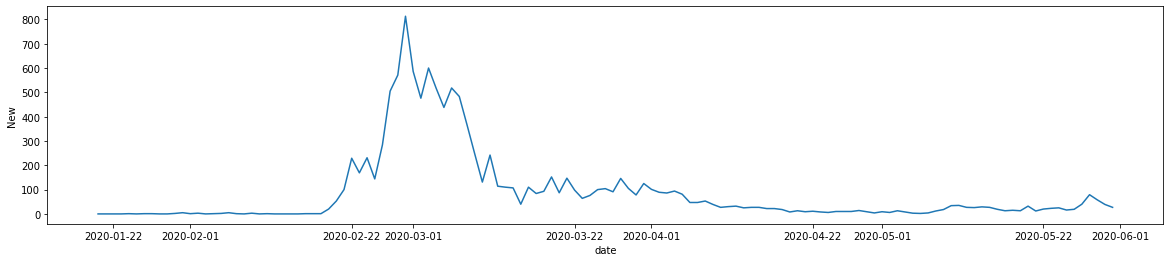

In [223]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=Time, x="date", y="New")

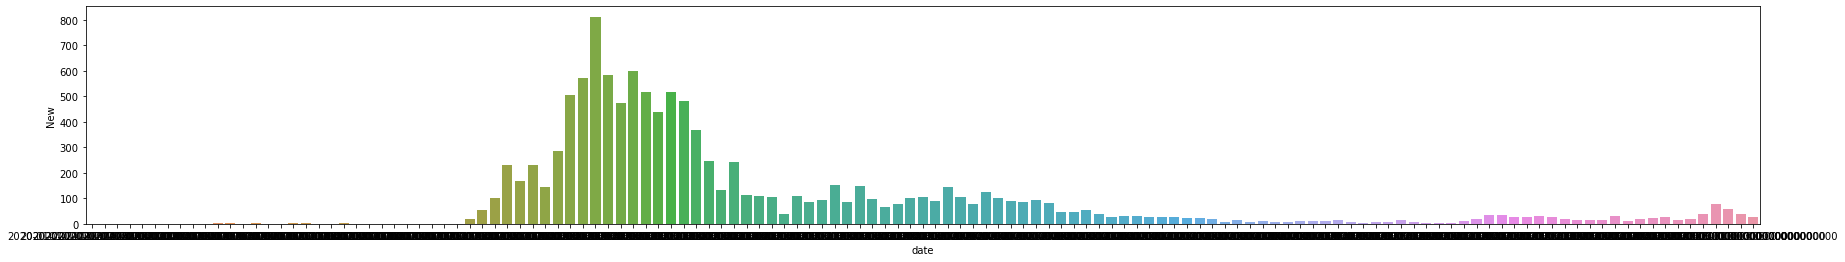

In [224]:
plt.figure(figsize=(30, 4))
sns.barplot(data=Time, x="date", y="New")

In [229]:
Dtime = Time.set_index('date', inplace=False)
Dtime

,New
date,
2020-01-20,0.0
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,1.0
...,...
2020-05-27,40.0
2020-05-28,79.0
2020-05-29,58.0


In [230]:
Dtime['2020-02']

,New
date,
2020-02-01,1.0
2020-02-02,3.0
2020-02-03,0.0
2020-02-04,1.0
2020-02-05,2.0
2020-02-06,5.0
2020-02-07,1.0
2020-02-08,0.0
2020-02-09,3.0


In [156]:
Time[Time['New'] > 600]

,date,New
40,2020-02-29,813.0


In [231]:
Time[Time['New'] > 500]

,date,New
38,2020-02-27,505.0
39,2020-02-28,571.0
40,2020-02-29,813.0
41,2020-03-01,586.0
43,2020-03-03,600.0
44,2020-03-04,516.0
46,2020-03-06,518.0


In [325]:
PI['confirmed_date'] = pd.to_datetime(PI.confirmed_date)
DPI = PI.set_index('confirmed_date', inplace=False)
DPI

<ipython-input-325-a9d06b2c2849>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PI['confirmed_date'] = pd.to_datetime(PI.confirmed_date)


,sex,age,country,province,city,infection_case,infection_order
confirmed_date,,,,,,,
2020-01-23,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,1.0
2020-01-30,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,1.0
2020-01-30,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2.0
2020-01-30,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,1.0
2020-01-31,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2.0
...,...,...,...,...,...,...,...
2020-04-03,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN
2020-04-03,male,30s,Korea,Jeju-do,Jeju-do,contact with patient,NaN
2020-04-03,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN


In [327]:
DPI['infection_case'].value_counts()

contact with patient                     1182
overseas inflow                           703
etc                                       601
Itaewon Clubs                             156
Guro-gu Call Center                       112
Shincheonji Church                        107
Coupang Logistics Center                   70
Onchun Church                              33
Bonghwa Pureun Nursing Home                31
gym facility in Cheonan                    30
Ministry of Oceans and Fisheries           28
Cheongdo Daenam Hospital                   21
Dongan Church                              17
Eunpyeong St. Mary's Hospital              16
Gyeongsan Seorin Nursing Home              15
Seongdong-gu APT                           13
Gyeongsan Jeil Silver Town                 12
Milal Shelter                              11
Gyeongsan Cham Joeun Community Center      10
KB Life Insurance                           8
Samsung Medical Center                      7
Geochang Church                   

In [330]:
DPI['infection_case'].isnull().sum()

793

In [250]:
boom = DPI['2020-02-18':'2020-03-01']
boom['infection_case'].value_counts()

contact with patient             221
etc                              218
Shincheonji Church                90
Onchun Church                     31
gym facility in Cheonan           27
Cheongdo Daenam Hospital          21
Eunpyeong St. Mary's Hospital     14
overseas inflow                   11
Milal Shelter                     10
Seongdong-gu APT                   9
Geochang Church                    6
Gyeongsan Seorin Nursing Home      4
Suyeong-gu Kindergarten            3
Pilgrimage to Israel               2
Changnyeong Coin Karaoke           1
Name: infection_case, dtype: int64

In [252]:
boom = DPI['2020-02-18':'2020-03-18']
boom['infection_case'].value_counts()

contact with patient                     561
etc                                      377
Shincheonji Church                       107
Guro-gu Call Center                      102
overseas inflow                           60
Onchun Church                             33
gym facility in Cheonan                   29
Ministry of Oceans and Fisheries          24
Bonghwa Pureun Nursing Home               23
Cheongdo Daenam Hospital                  21
Dongan Church                             17
Gyeongsan Seorin Nursing Home             15
Eunpyeong St. Mary's Hospital             14
Seongdong-gu APT                          13
Gyeongsan Jeil Silver Town                12
Milal Shelter                             11
Gyeongsan Cham Joeun Community Center     10
Geochang Church                            6
Changnyeong Coin Karaoke                   4
Suyeong-gu Kindergarten                    3
gym facility in Sejong                     3
Pilgrimage to Israel                       2
River of G

In [284]:
CN = DPI[DPI['infection_case'] == 'contact with patient']
CN

,sex,age,country,province,city,infection_case,infection_order
confirmed_date,,,,,,,
2020-01-30,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2.0
2020-01-31,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2.0
2020-01-31,female,50s,Korea,Seoul,Jongno-gu,contact with patient,3.0
2020-01-31,male,20s,Korea,Seoul,Jongno-gu,contact with patient,3.0
2020-02-05,female,60s,Korea,Seoul,Seongbuk-gu,contact with patient,3.0
...,...,...,...,...,...,...,...
2020-03-06,female,70s,Korea,Gyeongsangnam-do,Geochang-gun,contact with patient,NaN
2020-03-07,male,50s,Korea,Gyeongsangnam-do,Geochang-gun,contact with patient,NaN
2020-04-06,male,20s,Korea,Gyeongsangnam-do,Sacheon-si,contact with patient,NaN


In [285]:
CN['infection_case'] = CN['infection_case'].str[0]
CN

<ipython-input-285-30c6f3bf3ec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CN['infection_case'] = CN['infection_case'].str[0]


,sex,age,country,province,city,infection_case,infection_order
confirmed_date,,,,,,,
2020-01-30,male,50s,Korea,Seoul,Jongno-gu,c,2.0
2020-01-31,female,20s,Korea,Seoul,Seongbuk-gu,c,2.0
2020-01-31,female,50s,Korea,Seoul,Jongno-gu,c,3.0
2020-01-31,male,20s,Korea,Seoul,Jongno-gu,c,3.0
2020-02-05,female,60s,Korea,Seoul,Seongbuk-gu,c,3.0
...,...,...,...,...,...,...,...
2020-03-06,female,70s,Korea,Gyeongsangnam-do,Geochang-gun,c,NaN
2020-03-07,male,50s,Korea,Gyeongsangnam-do,Geochang-gun,c,NaN
2020-04-06,male,20s,Korea,Gyeongsangnam-do,Sacheon-si,c,NaN


In [298]:
CN['infection_Case'] = np.where(CN['infection_case'] == 'c', '1', CN['infection_case'])
CN['infection_Case'] = pd.to_numeric(CN['infection_Case'])
CN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1182 entries, 2020-01-30 to 2020-04-03
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              1148 non-null   object 
 1   age              1148 non-null   object 
 2   country          1182 non-null   object 
 3   province         1182 non-null   object 
 4   city             1168 non-null   object 
 5   infection_case   1182 non-null   object 
 6   infection_order  19 non-null     float64
 7   infection_Case   1182 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 123.1+ KB


<ipython-input-298-a97c6cccb4e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CN['infection_Case'] = np.where(CN['infection_case'] == 'c', '1', CN['infection_case'])
<ipython-input-298-a97c6cccb4e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CN['infection_Case'] = pd.to_numeric(CN['infection_Case'])


In [313]:
CN_date = CN['infection_Case'].groupby(CN.index)
CN_date.sum()
DCNSum = CN_date.sum()
Dcn = pd.DataFrame({'contact_infection':DCNSum.values, 'date':DCNSum.index})
Dcn = Dcn.set_index('date', inplace=False)
Dcn

,contact_infection
date,
2020-01-30,1
2020-01-31,3
2020-02-01,1
2020-02-02,2
2020-02-05,3
...,...
2020-05-28,23
2020-05-29,15
2020-05-30,10


In [314]:
Dtime

,New
date,
2020-01-20,0.0
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,1.0
...,...
2020-05-27,40.0
2020-05-28,79.0
2020-05-29,58.0


In [315]:
newNcontact = pd.concat([Dcn,Dtime])
newNcontact

,contact_infection,New
date,,
2020-01-30,1.0,NaN
2020-01-31,3.0,NaN
2020-02-01,1.0,NaN
2020-02-02,2.0,NaN
2020-02-05,3.0,NaN
...,...,...
2020-05-27,NaN,40.0
2020-05-28,NaN,79.0
2020-05-29,NaN,58.0


In [323]:
newNcontact = newNcontact.fillna(0)
newNcontact

,contact_infection,New
date,,
2020-01-30,1.0,0.0
2020-01-31,3.0,0.0
2020-02-01,1.0,0.0
2020-02-02,2.0,0.0
2020-02-05,3.0,0.0
...,...,...
2020-05-27,0.0,40.0
2020-05-28,0.0,79.0
2020-05-29,0.0,58.0


In [324]:
newNcontact.corr()

,contact_infection,New
contact_infection,1.000000,-0.244799
New,-0.244799,1.000000


In [166]:
Case = pd.read_csv('./COVIDdata/Case.csv')
Case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165
...,...,...,...,...,...,...,...,...
123,6100010,Gyeongsangnam-do,-,False,etc,19.0,-,-
124,7000001,Jeju-do,-,False,overseas inflow,10.0,-,-
125,7000002,Jeju-do,-,False,contact with patient,0.0,-,-
126,7000003,Jeju-do,-,False,etc,4.0,-,-


In [167]:
Case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_id         128 non-null    int64  
 1   province        128 non-null    object 
 2   city            128 non-null    object 
 3   group           128 non-null    bool   
 4   infection_case  128 non-null    object 
 5   confirmed       125 non-null    float64
 6   latitude        128 non-null    object 
 7   longitude       128 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 7.2+ KB


In [332]:
Ncase = Case['confirmed'].groupby(Case['infection_case'])
NcaseSum = Ncase.sum()
NcaseDf = pd.DataFrame({'infection_case':NcaseSum.index, 'confirmed':NcaseSum.values})
NcaseDf.sort_values(by=['confirmed'], axis=0, ascending=False).head()

,infection_case,confirmed
37,Shincheonji Church,5212.0
46,contact with patient,1236.0
47,etc,1068.0
50,overseas inflow,886.0
20,Itaewon Clubs,253.0


([<matplotlib.patches.Wedge at 0x21623307850>,
 [Text(1.0997663261829291, 0.022672181061896907, 'Bonghwa Pureun Nursing Home'),
  Text(1.098738640838286, 0.05266307177554227, 'Bundang Jesaeng Hospital'),
  Text(1.0982332522844704, 0.06231952805240876, 'Changnyeong Coin Karaoke'),
  Text(1.094925515251041, 0.10553727328409727, 'Cheongdo Daenam Hospital'),
  Text(1.084803282632148, 0.1822137151548042, 'Coupang Logistics Center'),
  Text(1.0710909041604135, 0.25052799249750135, 'Daesil Convalescent Hospital'),
  Text(1.0612714170264703, 0.28931467194497384, 'Dongan Church'),
  Text(1.0582333523837377, 0.30023685966695723, "Eunpyeong St. Mary's Hospital"),
  Text(1.0534656026428837, 0.31655998491323256, 'Fatima Hospital'),
  Text(1.0488488459066376, 0.3315359685468749, 'Geochang Church'),
  Text(1.0470242963245053, 0.3372537959848258, 'Geochang-gun Woongyang-myeon'),
  Text(1.0450645676621868, 0.34327838472156486, 'Goesan-gun Jangyeon-myeon'),
  Text(1.0439141394612876, 0.34676111291896533

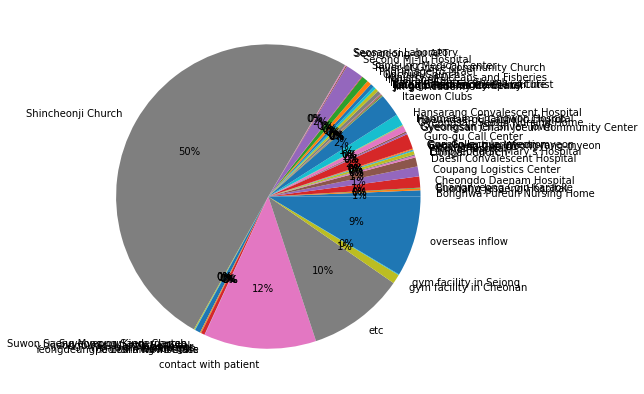

In [190]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1,1,1)
ax.pie(NcaseSum.values, labels=NcaseSum.index,autopct='%1.0f%%')

In [345]:
Stime

2020-01-20     0.0
2020-01-21     0.0
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     1.0
              ... 
2020-05-27    40.0
2020-05-28    79.0
2020-05-29    58.0
2020-05-30    39.0
2020-05-31    27.0
Length: 133, dtype: float64

In [349]:
Stime_cut = Stime.iloc[0:120]
Stime_cut

2020-01-20     0.0
2020-01-21     0.0
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     1.0
              ... 
2020-05-14    29.0
2020-05-15    27.0
2020-05-16    19.0
2020-05-17    13.0
2020-05-18    15.0
Length: 120, dtype: float64

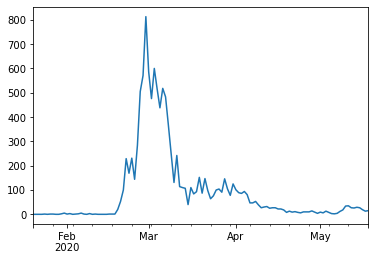

In [351]:
Stime_cut.plot()

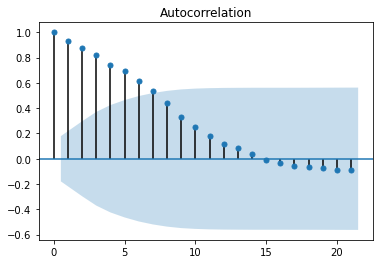

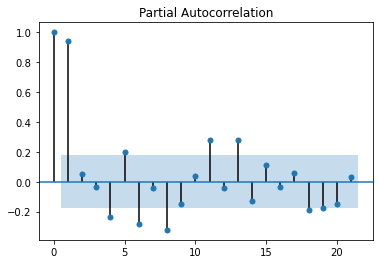

<Figure size 1440x288 with 0 Axes>

In [354]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(Stime_cut)
plot_pacf(Stime_cut)
plt.figure(figsize=(20,4))
plt.show()

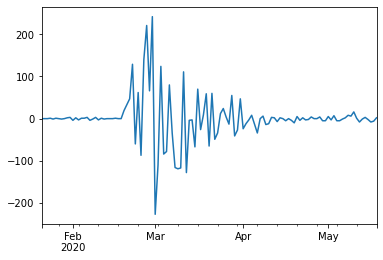

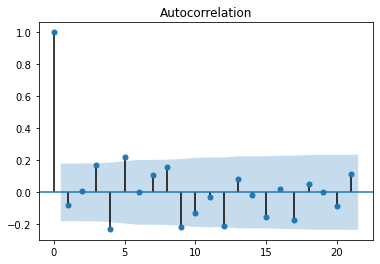

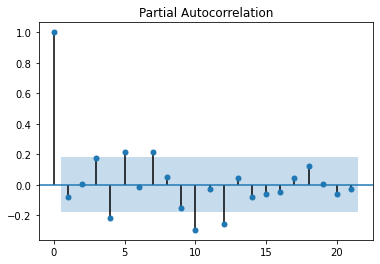

In [366]:
diff_1 = Stime_cut.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [368]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

model = ARIMA(Stime_cut, order=(1,1,0))
model_fit = model.fit(trend='c', full_output = True, disp = 1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -647.580
Method:                       css-mle   S.D. of innovations             55.862
Date:                Fri, 12 Jun 2020   AIC                           1301.161
Time:                        23:38:36   BIC                           1309.498
Sample:                    01-21-2020   HQIC                          1304.546
                         - 05-18-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1250      4.754      0.026      0.979      -9.193       9.443
ar.L1.D.y     -0.0778      0.091     -0.855      0.393      -0.256       0.101
                                    Roots           

D:\Python 3.8.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Python 3.8.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


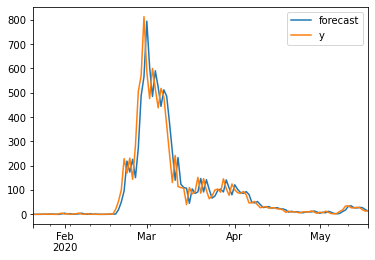

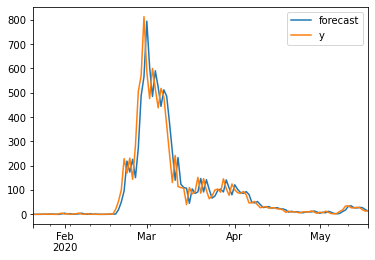

In [363]:
model_fit.plot_predict()

In [364]:
fore = model_fit.forecast(steps = 1)
print(fore)

(array([14.8443947]), array([55.8623165]), array([[-94.64373374, 124.33252314]]))


In [365]:
Stime.iloc[120:]

2020-05-19    13.0
2020-05-20    32.0
2020-05-21    12.0
2020-05-22    20.0
2020-05-23    23.0
2020-05-24    25.0
2020-05-25    16.0
2020-05-26    19.0
2020-05-27    40.0
2020-05-28    79.0
2020-05-29    58.0
2020-05-30    39.0
2020-05-31    27.0
dtype: float64